In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

from utils import *
from matplotlib import pyplot as plt
from pymongo import MongoClient

### Parâmetros do Matplot, Seaborn e Pandas

In [2]:
%matplotlib inline
pd.options.mode.chained_assignment = None 
plt.rcParams['figure.figsize'] = [10, 5]
sns.set(rc={'figure.figsize':(15,10)})

pd.set_option('display.max_columns', 50)

### Recuperação de Datasets do MongoDB

In [3]:
df_meteorologia_2010_2019 = mongo_to_dataframe("meteorologia_2010_2019")

In [4]:
df_acidentes_fatais_2008_2017 = mongo_to_dataframe("acidentes_fatais_2008_2017")

In [6]:
df_acidentes_rodovias_2010_2019 = mongo_to_dataframe("acidentes_rodovias_2010_2019")

In [6]:
df_infracoes_prf_2010_2018 = mongo_to_dataframe("infracoes_prf_2010_2018")

In [7]:
df_infracoes_der_2018_2019 = mongo_to_dataframe("infracoes_der_2018_2019")

## Análise dos acidentes fatais em relação com condições climáticas

In [6]:
dict_meses = {1: 'Janeiro',
              2: 'Fevereiro',
              3: 'Março',
              4: 'Abril',
              5: 'Maio',
              6: 'Junho',
              7: 'Julho',
              8: 'Agosto',
              9: 'Setembro',
              10: 'Outubro',
              11: 'Novembro',
              12: 'Dezembro'}

Text(0, 0.5, 'Precipitação (mm)')

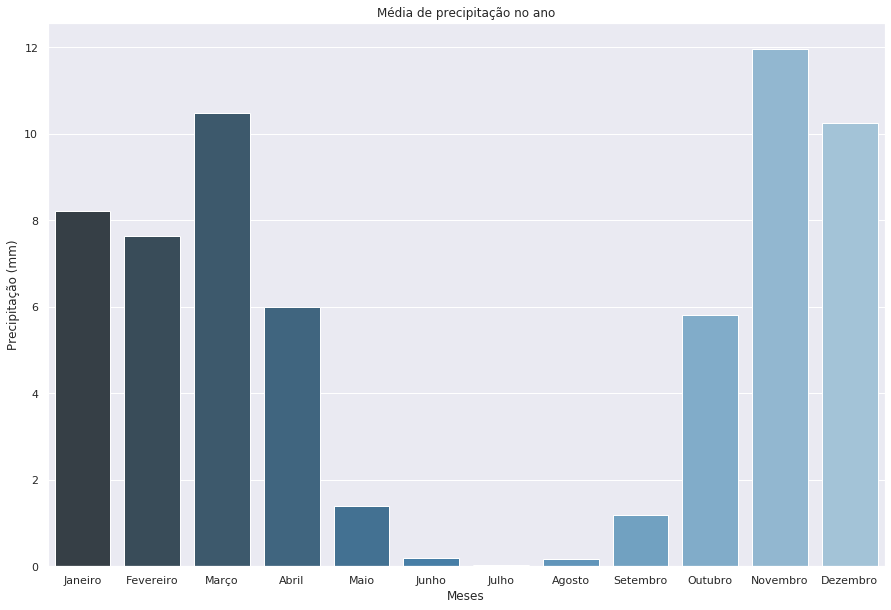

In [21]:
df_meteorologia_2010_2019['Mes'] = df_meteorologia_2010_2019['Data'].dt.month
media_precipitacao_meses = df_meteorologia_2010_2019.groupby('Mes').mean().reset_index()
media_precipitacao_meses = media_precipitacao_meses[['Mes', 'Precipitacao']]

media_precipitacao_meses['Mes'] = media_precipitacao_meses['Mes'].replace(dict_meses)
sns.barplot(x = media_precipitacao_meses['Mes'],
            y = media_precipitacao_meses['Precipitacao'],
            data = media_precipitacao_meses,
            palette = "Blues_d")
plt.title("Média de precipitação no ano")
plt.xlabel("Meses")
plt.ylabel("Precipitação (mm)")

In [46]:
media_precipitacao_meses['Precipitacao']

0      8.204516
1      7.641489
2     10.480645
3      6.002333
4      1.386774
5      0.184333
6      0.032581
7      0.170874
8      1.196296
9      5.809319
10    11.964444
11    10.253763
Name: Precipitacao, dtype: float64

In [23]:
historico_precipitacao_meses = df_meteorologia_2010_2019
historico_precipitacao_meses['Ano'] = historico_precipitacao_meses['Data'].dt.year
historico_precipitacao_meses['Mes Ano'] = historico_precipitacao_meses['Mes'] * 10000 + historico_precipitacao_meses['Ano']
historico_precipitacao_meses = historico_precipitacao_meses.groupby('Mes Ano').mean().reset_index()
historico_precipitacao_meses['Mes'] = historico_precipitacao_meses['Mes'].replace(dict_meses)
historico_precipitacao_meses.head()

,Mes Ano,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Mes,Ano
0,12010,8.770968,28.032258,18.461290,6.848387,4.651613,22.503871,76.000000,2.548387,Janeiro,2010
1,12011,4.612903,27.451613,18.451613,6.545161,3.883871,22.007097,79.701613,3.010753,Janeiro,2011
2,12012,10.238710,25.648387,17.345161,3.703226,2.861290,20.649677,83.548387,2.311828,Janeiro,2012
3,12013,18.996774,26.522581,18.277419,4.245161,3.519355,21.582581,81.629032,2.295699,Janeiro,2013
4,12014,5.719355,28.041935,17.870968,8.432258,5.309677,22.288387,72.491935,2.335818,Janeiro,2014


In [11]:
def plot_precipitacao_meses(meses):
    plot = sns.FacetGrid(meses, col='Mes')
    plot.map(sns.barplot, 'Ano', 'Precipitacao')
    plot.set_xticklabels(rotation=90)

/home/hugo/anaconda3/envs/tcc/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


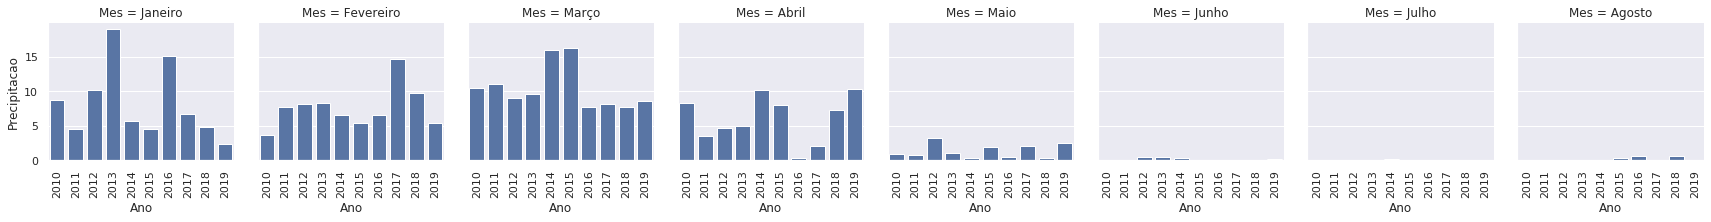

In [12]:
jan_ago = historico_precipitacao_meses.loc[historico_precipitacao_meses['Mes Ano'] <= 82019]
plot_precipitacao_meses(jan_ago)

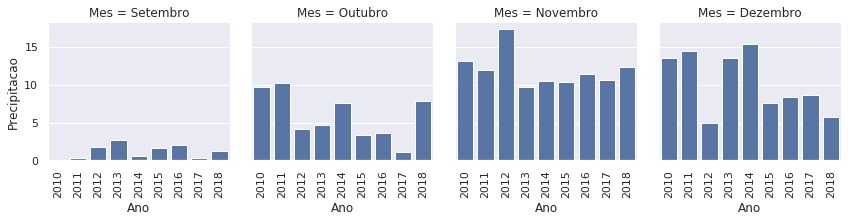

In [13]:
set_dez = historico_precipitacao_meses.loc[historico_precipitacao_meses['Mes Ano'] > 82019]
plot_precipitacao_meses(set_dez)

### Observações
- Os meses com maiores médias de precipitação vão de novembro até março, enquanto a época de estiagem compreende o período de maio a setembro. Abril e outubro são meses que estão entre as estações de secas e chuvas.
- Os índices de precipitação não são constantes no decorrer dos anos a depender do mês. Com isso, dependendo do ano, a ordem dos meses mais chuvosos fica diferente.
- No mês de janeiro é possível observar isso claramente, já que a média de precipitação varia bastante dependendo do ano.

In [13]:
df_acidentes_rodovias_2010_2019['condicao_metereologica'].unique().tolist()

['Chuva',
 'Sol',
 'Ceu Claro',
 'Nublado',
 'Ignorada',
 'Nevoeiro/neblina',
 'Vento',
 'Céu Claro           ',
 'Nublado             ',
 'Sol                 ',
 'Chuva               ',
 'Ignorado            ',
 'Garoa/Chuvisco      ',
 'Nevoeiro/Neblina    ',
 'Vento               ',
 'Céu Claro',
 'Garoa/Chuvisco',
 'Ignorado',
 'Nevoeiro/Neblina',
 'Neve',
 'Granizo']

In [14]:
# Substitui string para padronizar determinada coluna do dataframe.
def padroniza_coluna_dataset(dataframe, coluna, nao_padrao, padrao):
    dataframe[coluna] = dataframe[coluna].str.replace(nao_padrao, padrao)

In [15]:
# Os dados de condicoes meteorologicas possuem labels iguais, mas formatadas de maneira diferente.
df_acidentes_rodovias_2010_2019['condicao_metereologica'] = df_acidentes_rodovias_2010_2019['condicao_metereologica'].str.lower()
padroniza_coluna_dataset(df_acidentes_rodovias_2010_2019, 'condicao_metereologica', 'é', 'e')
padroniza_coluna_dataset(df_acidentes_rodovias_2010_2019, 'condicao_metereologica', ' ', '')
padroniza_coluna_dataset(df_acidentes_rodovias_2010_2019, 'condicao_metereologica', 'uc', 'u c')
padroniza_coluna_dataset(df_acidentes_rodovias_2010_2019, 'condicao_metereologica', 'ignorado', 'ignorada')

df_acidentes_rodovias_2010_2019['condicao_metereologica'].unique().tolist()

['chuva',
 'sol',
 'ceu claro',
 'nublado',
 'ignorada',
 'nevoeiro/neblina',
 'vento',
 'garoa/chuvisco',
 'neve',
 'granizo']

In [16]:
# Algumas labels tem vários espaços no final
df_acidentes_rodovias_2010_2019['tipo_acidente'] = df_acidentes_rodovias_2010_2019['tipo_acidente'].str.capitalize()
padroniza_coluna_dataset(df_acidentes_rodovias_2010_2019, 'tipo_acidente', '  ', '-')
padroniza_coluna_dataset(df_acidentes_rodovias_2010_2019, 'tipo_acidente', '- ', '-')
padroniza_coluna_dataset(df_acidentes_rodovias_2010_2019, 'tipo_acidente', '-', '')
df_acidentes_rodovias_2010_2019['tipo_acidente'].unique().tolist()

['Capotamento',
 'Saída de pista',
 'Colisão traseira',
 'Colisão lateral',
 'Colisão transversal',
 'Colisão com objeto fixo',
 'Queda de motocicleta / bicicleta / veículo',
 'Colisão frontal',
 'Atropelamento de pessoa',
 'Atropelamento de animal',
 'Tombamento',
 'Colisão com bicicleta',
 'Incêndio',
 'Danos eventuais',
 'Colisão com objeto móvel',
 'Colisão com objeto estático',
 'Saída de leito carroçável',
 'Queda de ocupante de veículo',
 'Atropelamento de pedestre',
 'Engavetamento',
 'Colisão com objeto em movimento',
 'Derramamento de carga']

Text(0, 0.5, 'Número de acidentes')

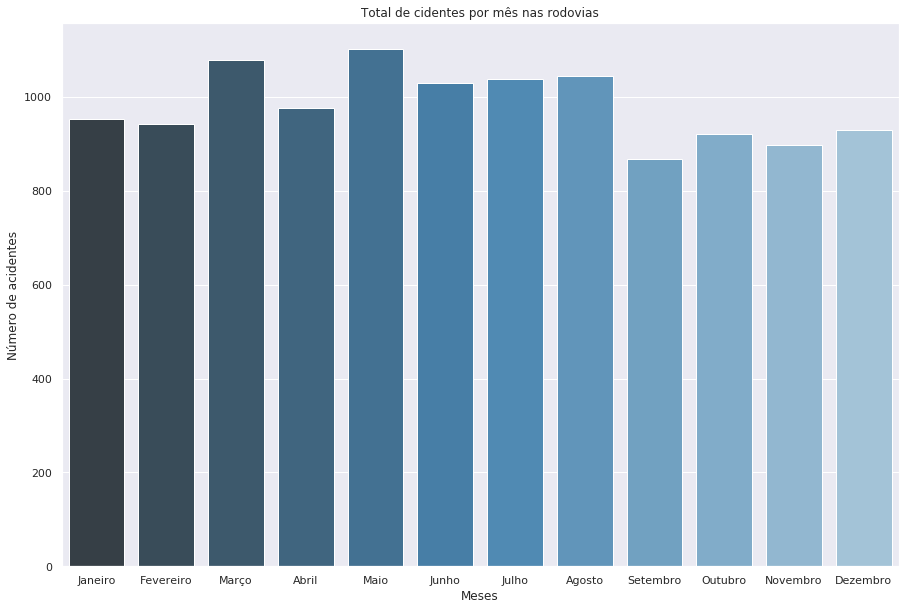

In [17]:
df_acidentes_rodovias_2010_2019['Mes'] = df_acidentes_rodovias_2010_2019['data_inversa'].dt.month
acidentes_rodovias_meses = df_acidentes_rodovias_2010_2019.groupby('Mes').count().reset_index()
# acidentes_rodovias_meses[acidentes_rodovias_meses.Mes <= 7] = media_acidentes_rodovias_meses / 9
# acidentes_rodovias_meses[acidentes_rodovias_meses.Mes > 7] = media_acidentes_rodovias_meses / 8
acidentes_rodovias_meses['Mes'] = acidentes_rodovias_meses.index + 1
acidentes_rodovias_meses = acidentes_rodovias_meses[['Mes', 'causa_acidente']]

acidentes_rodovias_meses['Mes'] = acidentes_rodovias_meses['Mes'].replace(dict_meses)
sns.barplot(x = acidentes_rodovias_meses['Mes'],
            y = acidentes_rodovias_meses['causa_acidente'],
            data = acidentes_rodovias_meses,
            palette = "Blues_d")
plt.title("Total de cidentes por mês nas rodovias")
plt.xlabel("Meses")
plt.ylabel("Número de acidentes")

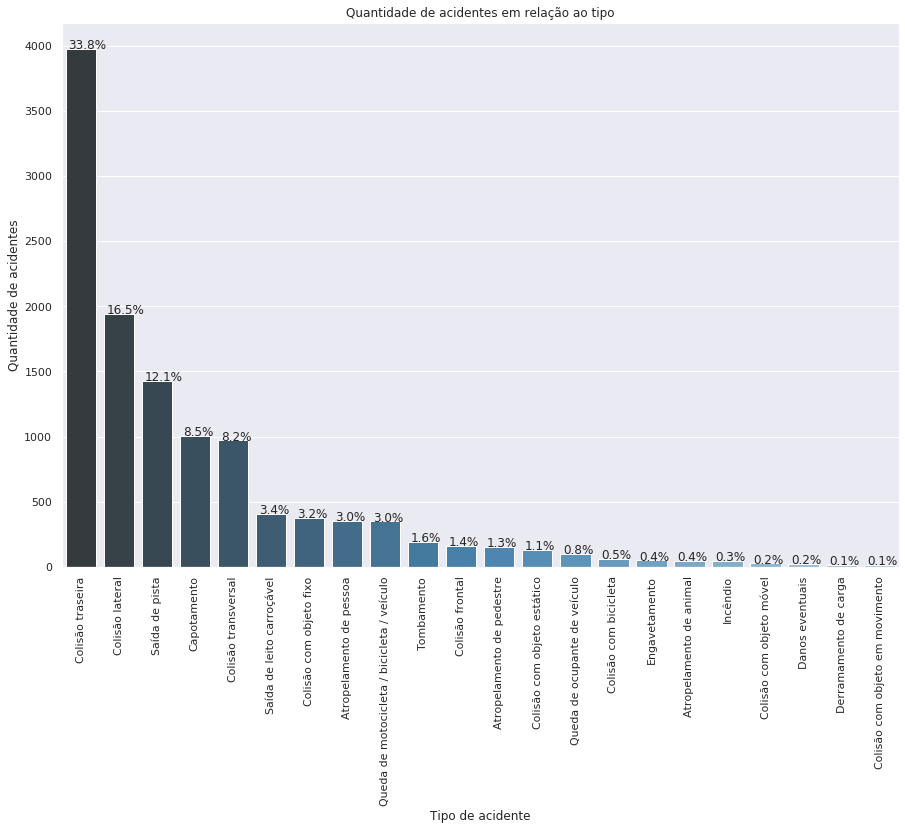

In [18]:
tipos_acidentes = df_acidentes_rodovias_2010_2019.groupby('tipo_acidente').count().reset_index().sort_values('causa_acidente', ascending=False)

grafico = sns.barplot(x = tipos_acidentes['tipo_acidente'],
                      y = tipos_acidentes['causa_acidente'],
                      data = tipos_acidentes,
                      palette = "Blues_d")
plt.title("Quantidade de acidentes em relação ao tipo")
plt.xlabel("Tipo de acidente")
plt.ylabel("Quantidade de acidentes")
plt.xticks(rotation=90)

n_acidentes = tipos_acidentes['causa_acidente'].reset_index().drop(columns='index')
total = tipos_acidentes['causa_acidente'].sum()
i = 0
for p in grafico.patches:
    percentage = '{:.1f}%'.format(100 * n_acidentes['causa_acidente'][i]/total)
    x = p.get_x() + p.get_width()/10 
    y = p.get_y() + p.get_height() + 0.04
    grafico.annotate(percentage, (x, y))
    i += 1

plt.show()

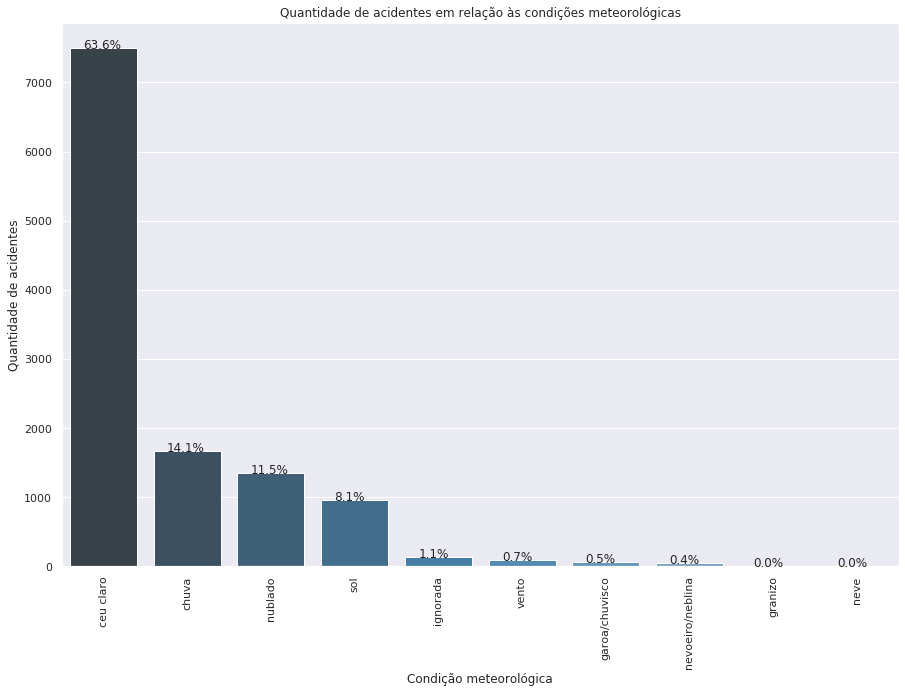

In [34]:
condicoes_climaticas = df_acidentes_rodovias_2010_2019.groupby('condicao_metereologica').count().reset_index().sort_values('causa_acidente', ascending=False)

grafico = sns.barplot(x = condicoes_climaticas['condicao_metereologica'],
                      y = condicoes_climaticas['causa_acidente'],
                      data = condicoes_climaticas,
                      palette = "Blues_d")
plt.title("Quantidade de acidentes em relação às condições meteorológicas")
plt.xlabel("Condição meteorológica")
plt.ylabel("Quantidade de acidentes")
plt.xticks(rotation=90)

n_acidentes = condicoes_climaticas['causa_acidente'].reset_index().drop(columns='index')
total = condicoes_climaticas['causa_acidente'].sum()
i = 0
for p in grafico.patches:
    percentage = '{:.01f}%'.format(100 * n_acidentes['causa_acidente'][i]/total)
    x = p.get_x() + p.get_width()/5 
    y = p.get_y() + p.get_height() + 0.04
    grafico.annotate(percentage, (x, y))
    i += 1

plt.show()

In [35]:
neve_granizo = df_acidentes_rodovias_2010_2019.loc[df_acidentes_rodovias_2010_2019['condicao_metereologica'].isin(['neve', 'granizo'])]
neve_granizo

,data_inversa,dia_semana,horario,uf,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,Mes
9529,2012-03-02,Sexta,16:15:00,DF,60.0,0.1,Outras,Colisão com objeto fixo,Ignorado,Plena noite,Decrescente,neve,Dupla,Reta,Urbano,2012,2,0,0,0,0,2,0,1,3
10411,2012-10-13,Sábado,06:15:00,DF,20.0,0,Outras,Saída de pista,Com Vítimas Feridas,Pleno dia,Decrescente,granizo,Dupla,Curva,Rural,2012,1,0,1,0,0,0,1,1,10


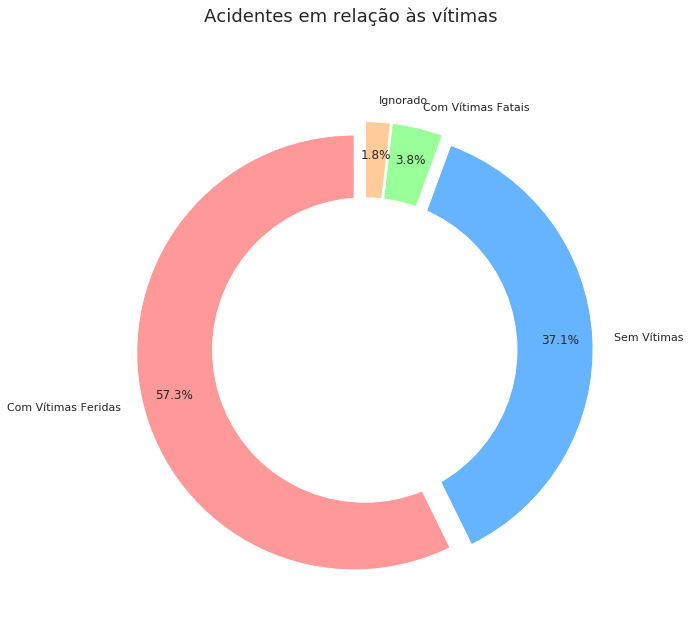

In [20]:
classificacao_vitimas = df_acidentes_rodovias_2010_2019.groupby('classificacao_acidente').count().sort_values('causa_acidente', ascending=False).reset_index()

cores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05,0.05,0.05)
 
plt.pie(classificacao_vitimas['causa_acidente'],
         colors=cores,
         labels=classificacao_vitimas['classificacao_acidente'],
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.85,
         explode=explode)

circulo = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

fig.suptitle("Acidentes em relação às vítimas", fontsize=18)
plt.show()

### Observações
- A quantidade total de acidentes é relativamente constante de acordo com o mês, variando de 867, no mês de setembro, até 1103, em maio.
- A maior parte dos acidentes é do tipo colisão traseira (33,8%). Colisão lateral (16,5%), saída de pista (12,1%), capotamento (8,5%) e colisão transversal (8,2%) são as outras ocorrências mais comuns, repectivamente. Somente esses cinco tipos de acidentes correspondem a cerca de 79,1% do total de acidentes, sendo os outros 17 tipos o restante.
- A maior parte dos acidentes aconteceu na condição de céu claro (63,6%). As condições de chuva (14,1%), nebulosidade (11,5%) e sol (8,1%) foram as seguintes mais relevantes. O restante das seis classificações de condição meteorológica correspondem a menos de 3% do total.
- Existe uma ocorrência de um acidente na BR-060, em março 2012, de um acidente cuja condição meteorológica era de neve.
- A minoria dos acidentes teve alguma vítima fatal (menos de 500 no período, 3,8% do total), enquanto a maior parte teve vítimas feridas (57,3%) ou sem vítimas (37,1%). O restante, 1.8%, foram classificados como ignorado.

In [40]:
def isola_condicao_meteorologica(condicao_meteorologica, agrupamento):
    acidentes_condicao_meteorologica = df_acidentes_rodovias_2010_2019.loc[df_acidentes_rodovias_2010_2019['condicao_metereologica'] == condicao_meteorologica]
    acidentes_condicao_meteorologica = acidentes_condicao_meteorologica.groupby(agrupamento).count().reset_index().sort_values('causa_acidente', ascending=False)
    
    return acidentes_condicao_meteorologica

In [41]:
def barplot_com_subplots(lista_df, lista_df_label, x, y, titulo):
    n_plots = len(lista_df)
    fig, axs = plt.subplots(n_plots, 1, figsize=(30, 20))
    fig.subplots_adjust(hspace=0.9, wspace=0.9)

    i = 0
    for item in lista_df:
        g_barras = sns.barplot(x = item[x],
                               y = item[y],
                               data = item,
                               palette = "Blues_d",
                               ax = axs[i])
        axs[i].tick_params(labelrotation=90)
        axs[i].set_ylabel('Quantidade')
        axs[i].set_xlabel('')
        axs[i].set_title(lista_df_label[i])
        i += 1

        n_acidentes = item[y].reset_index().drop(columns='index')
        total = item[y].sum()
        j = 0
        for p in g_barras.patches:
            percentage = '{:.1f}%'.format(100 * n_acidentes['causa_acidente'][j]/total)
            x_p = p.get_x() + p.get_width()/5 
            y_p = p.get_y() + p.get_height() + 0.04
            g_barras.annotate(percentage, (x_p, y_p))
            j += 1

    
    fig.suptitle(titulo, fontsize=25)
    plt.xlabel("")
    plt.show()

In [42]:
def gera_listas_condicao_meteorologica(agrupamento):
    acidentes_condicao_ceu_claro = isola_condicao_meteorologica('ceu claro', agrupamento)
    acidentes_condicao_chuvosa = isola_condicao_meteorologica('chuva', agrupamento)
    acidentes_condicao_nublada = isola_condicao_meteorologica('nublado', agrupamento)
    acidentes_condicao_ensolarada = isola_condicao_meteorologica('sol', agrupamento)

    lista_df_acidentes = [acidentes_condicao_ceu_claro,
                          acidentes_condicao_chuvosa,
                          acidentes_condicao_nublada,
                          acidentes_condicao_ensolarada]
    lista_condicao_meteorologica = ['Céu claro', 'Chuva', 'Nublado', 'Sol']
    
    return lista_df_acidentes, lista_condicao_meteorologica

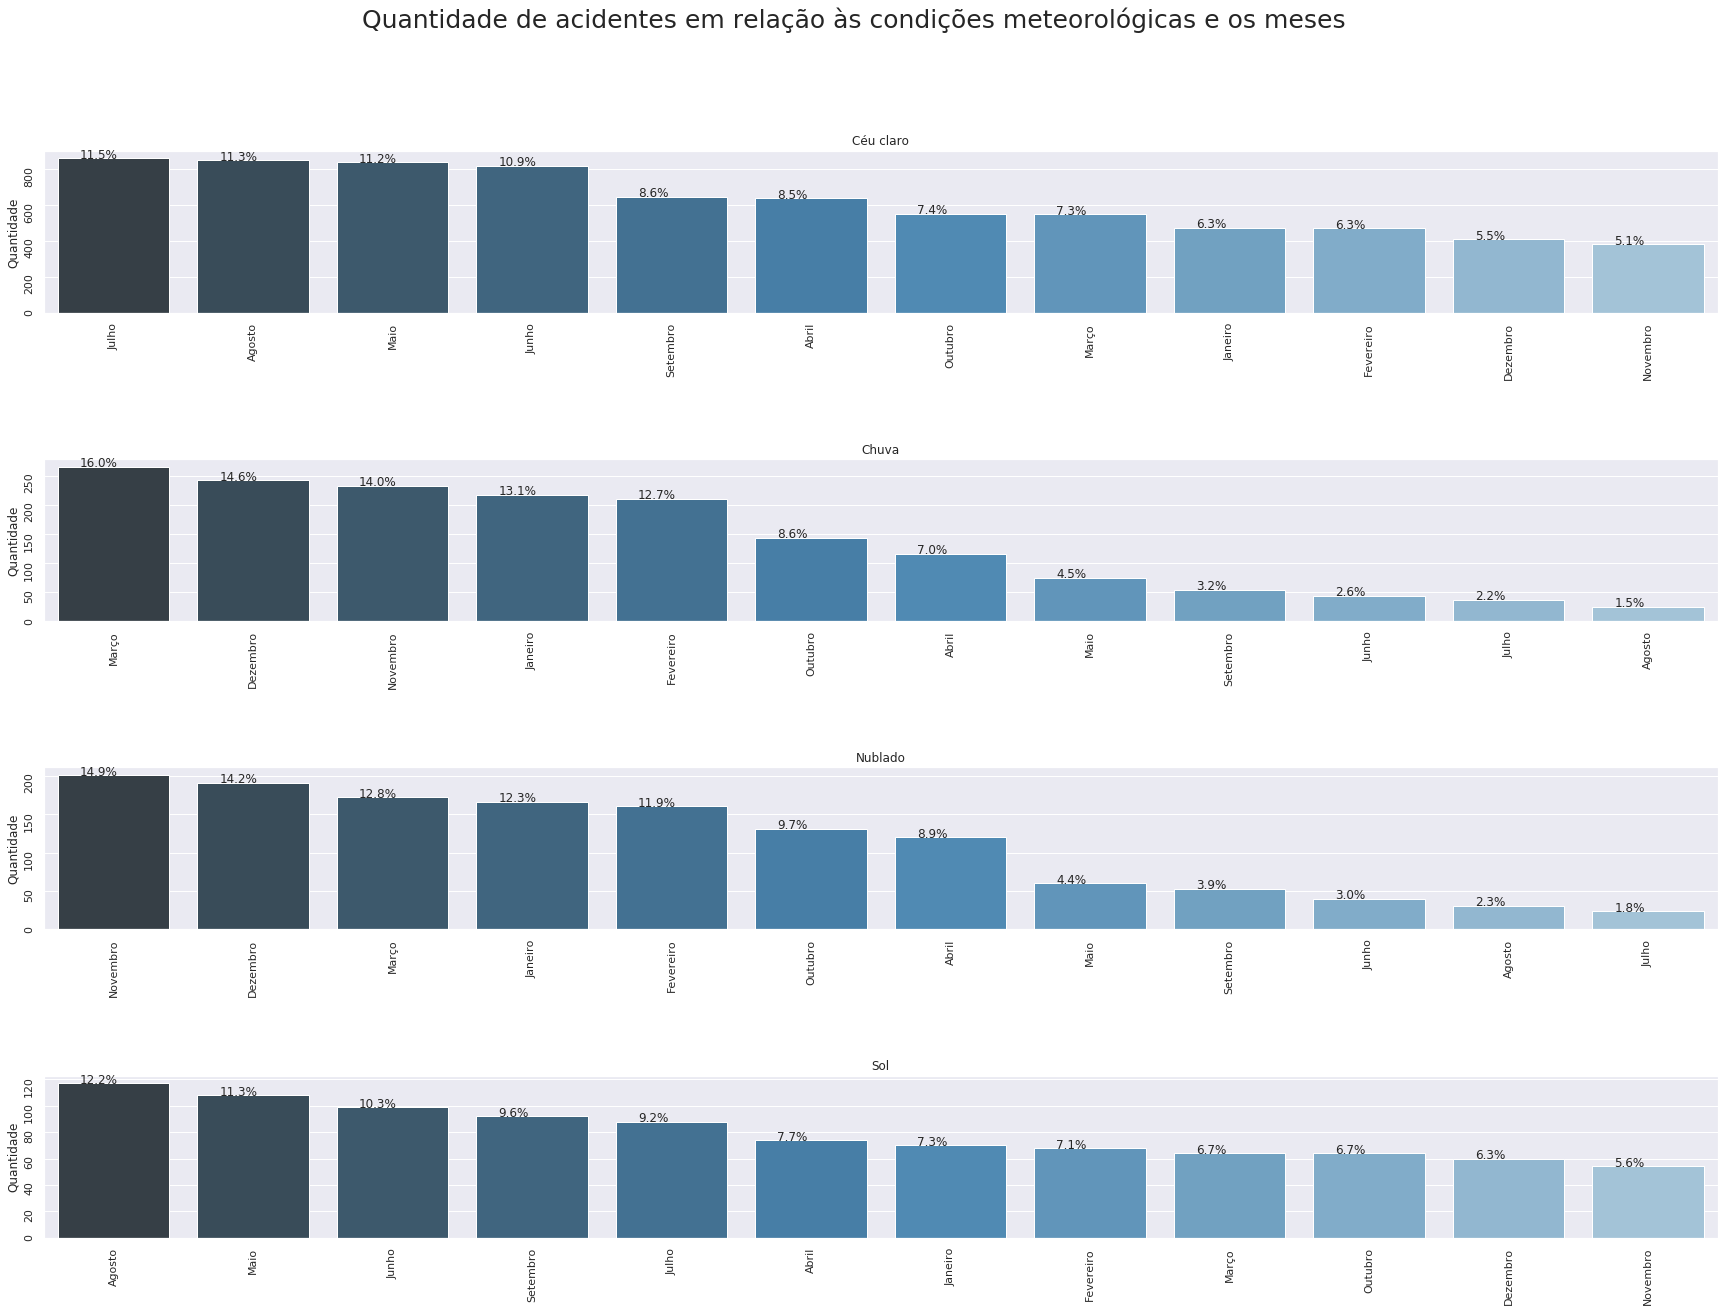

In [51]:
lista_df_acidentes, lista_condicao_meteorologica = gera_listas_condicao_meteorologica('Mes')
for lista in lista_df_acidentes:
    lista['Mes'] = lista['Mes'].replace(dict_meses)

titulo = "Quantidade de acidentes em relação às condições meteorológicas e os meses"
barplot_com_subplots(lista_df_acidentes, lista_condicao_meteorologica, 'Mes', 'causa_acidente', titulo)

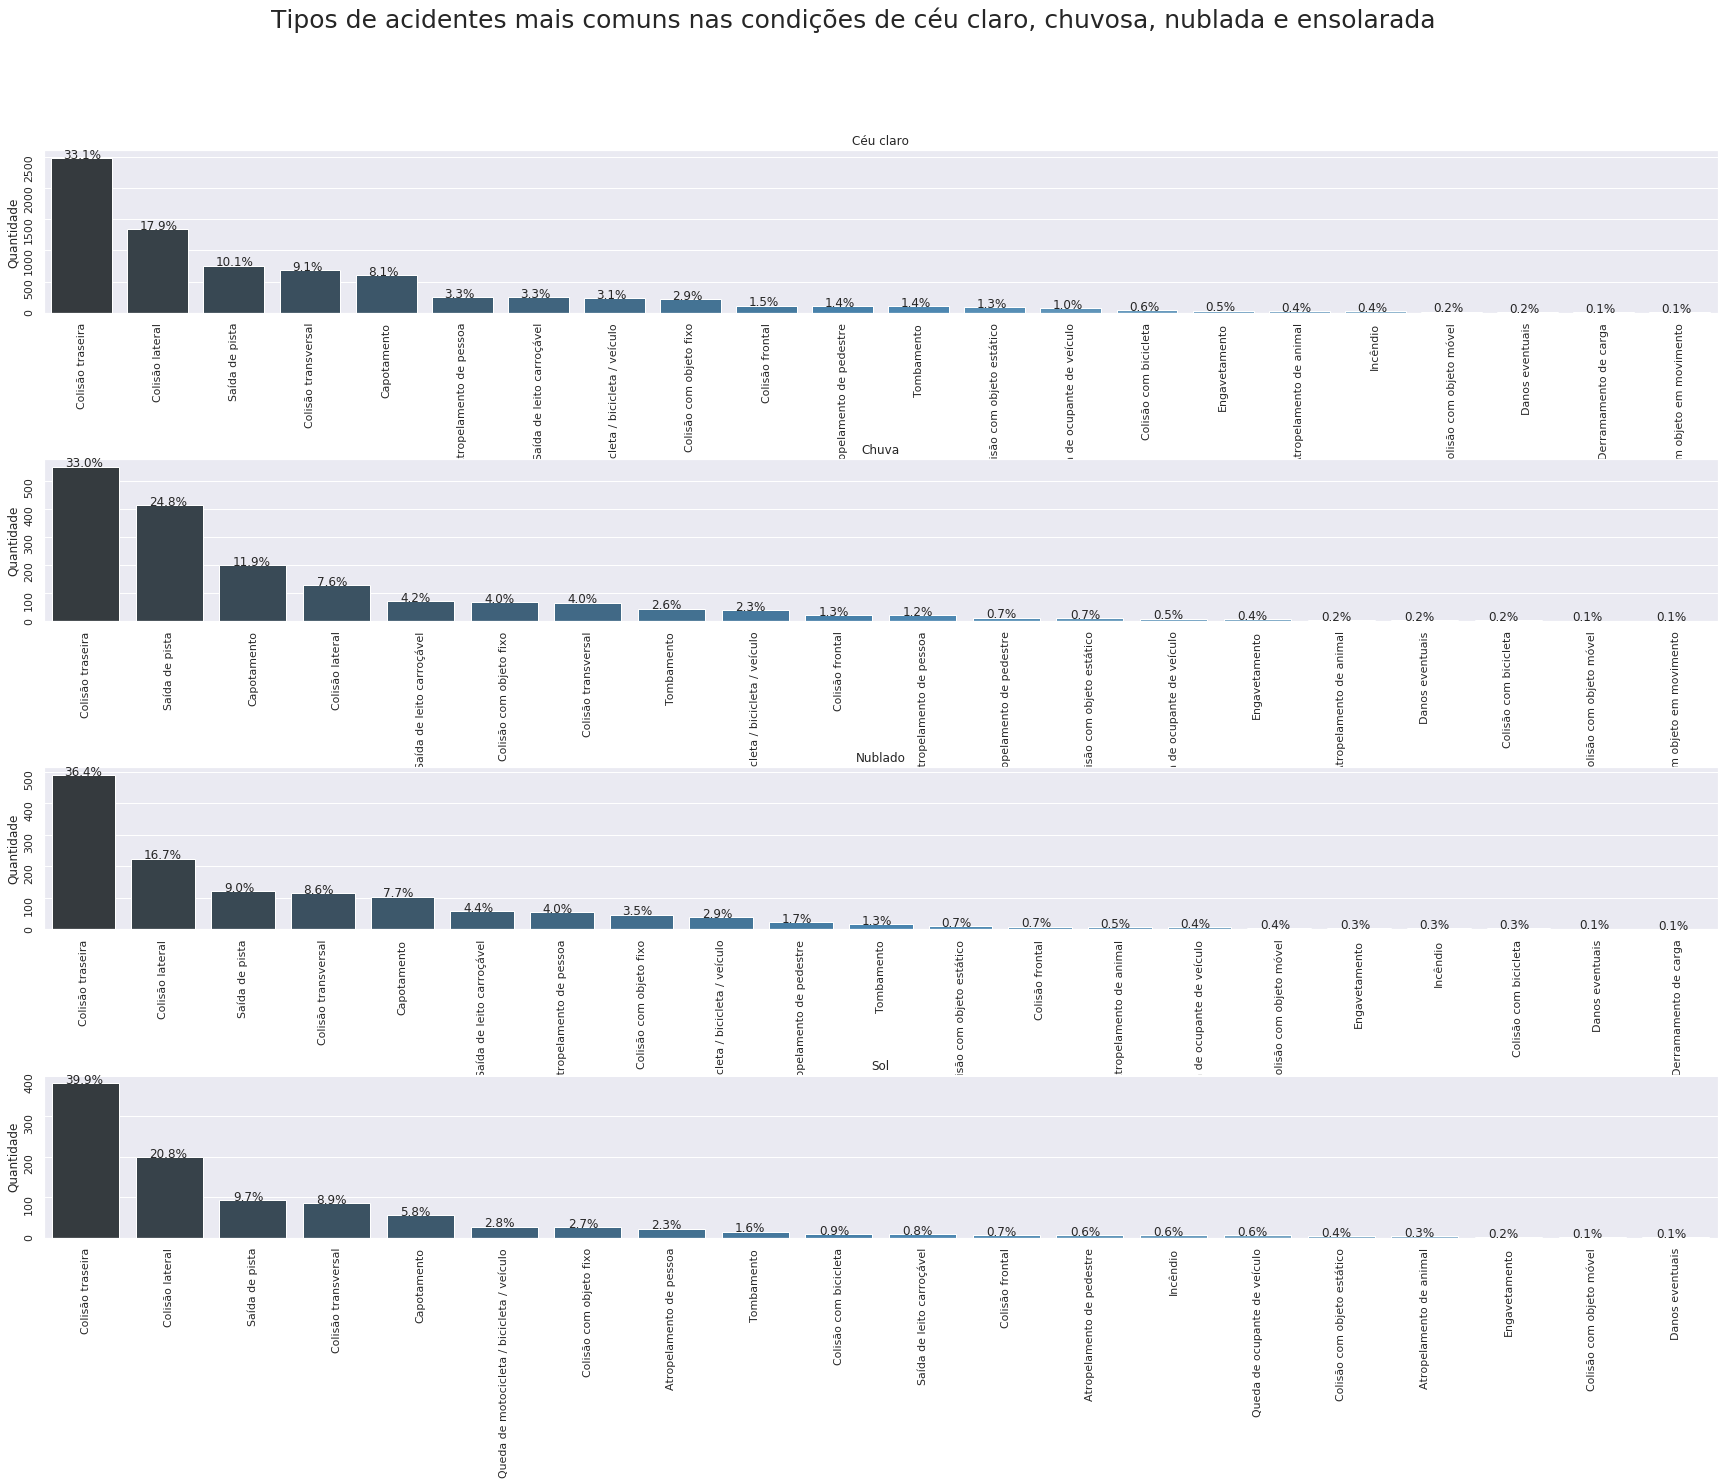

In [25]:
titulo = "Tipos de acidentes mais comuns nas condições de céu claro, chuvosa, nublada e ensolarada"
lista_df_acidentes, lista_condicao_meteorologica = gera_listas_condicao_meteorologica('tipo_acidente')
barplot_com_subplots(lista_df_acidentes, lista_condicao_meteorologica, 'tipo_acidente', 'causa_acidente', titulo)

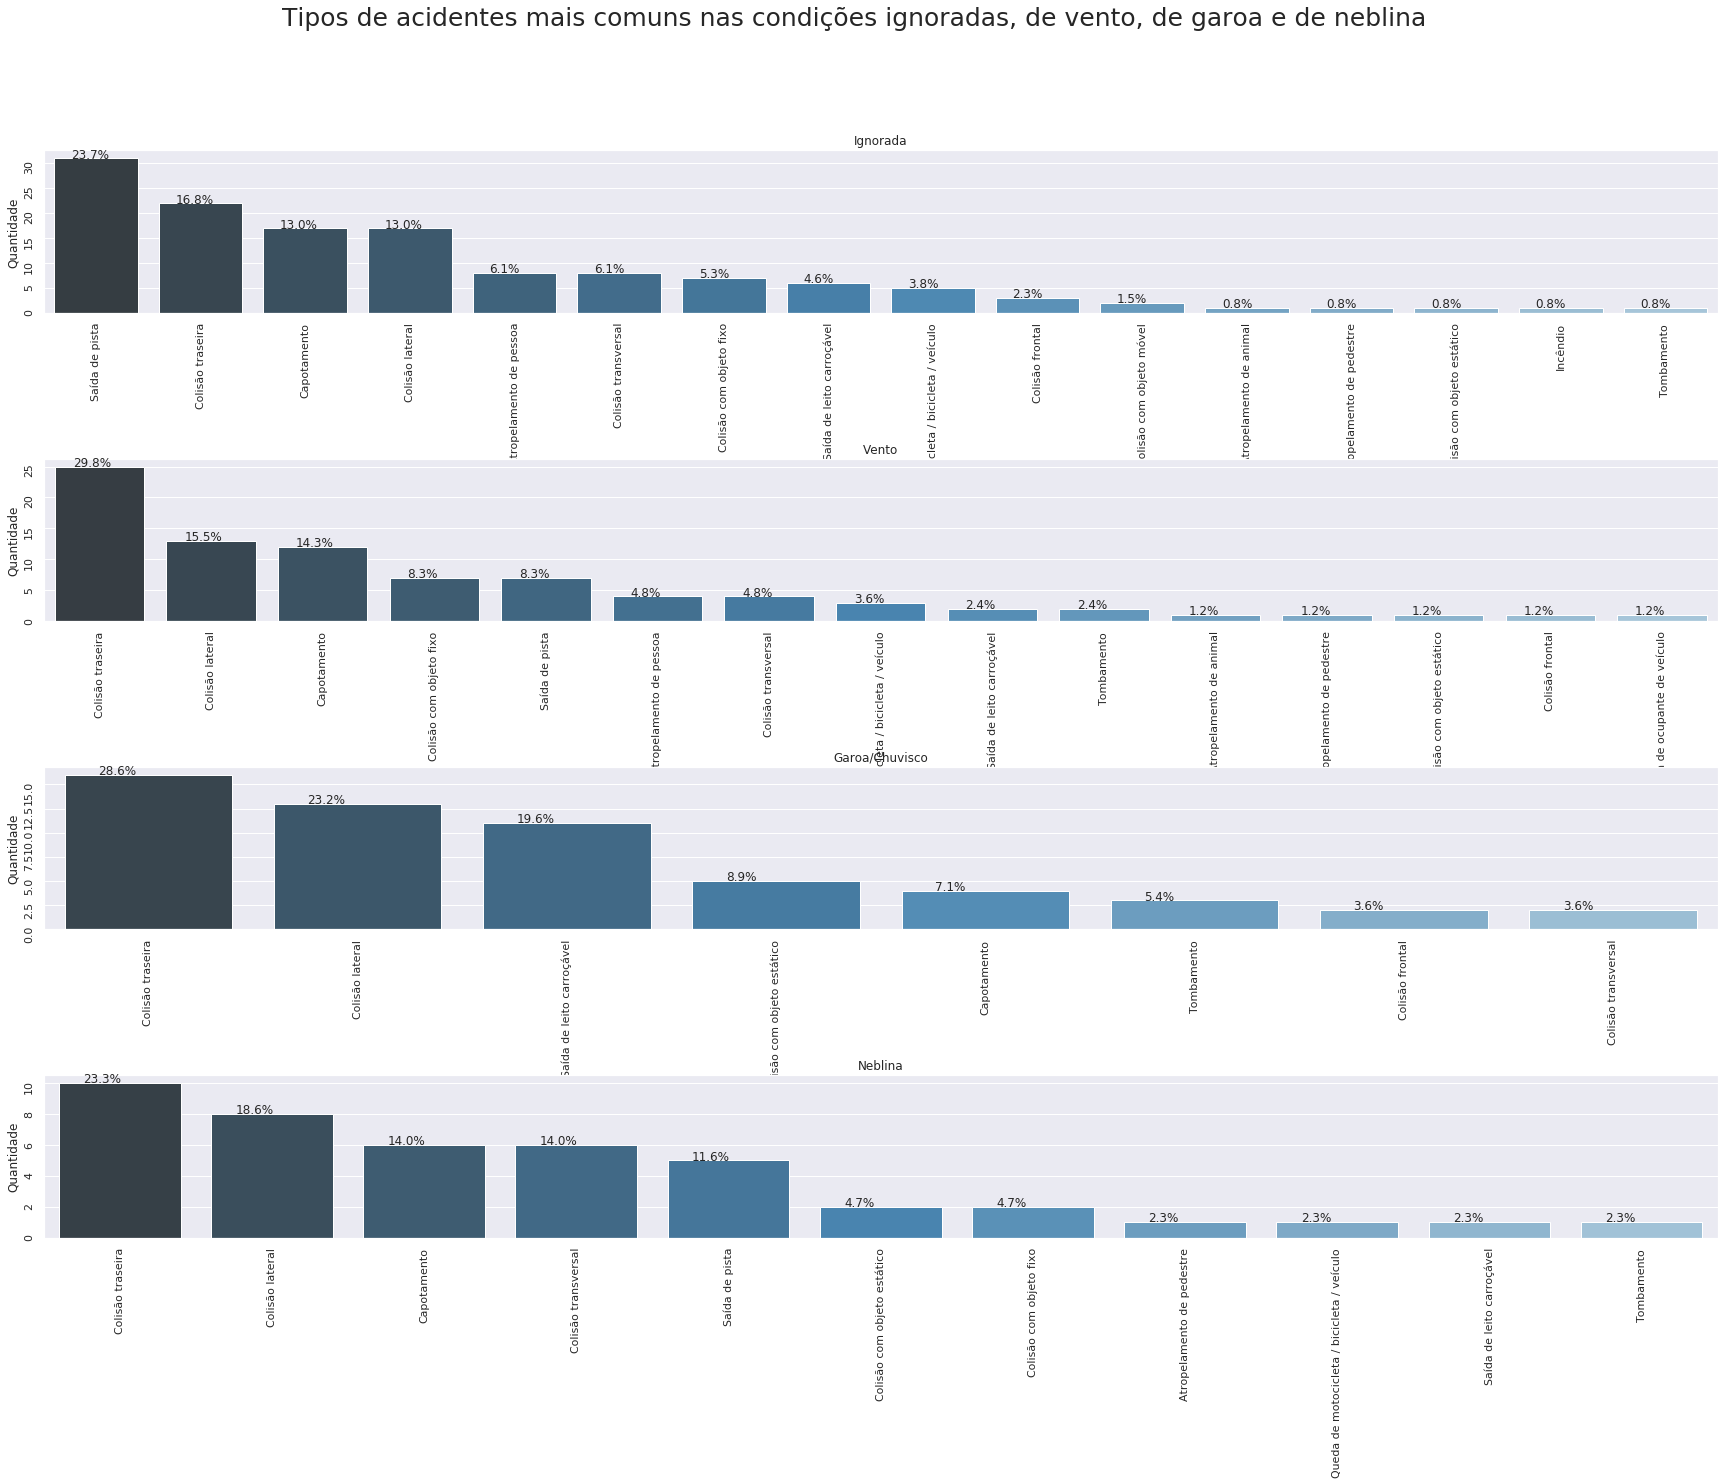

In [26]:
acidentes_condicao_ignorada = isola_condicao_meteorologica('ignorada', 'tipo_acidente')
acidentes_condicao_vento = isola_condicao_meteorologica('vento', 'tipo_acidente')
acidentes_condicao_garoa = isola_condicao_meteorologica('garoa/chuvisco', 'tipo_acidente')
acidentes_condicao_neblina = isola_condicao_meteorologica('nevoeiro/neblina', 'tipo_acidente')

lista_df_acidentes = [acidentes_condicao_ignorada,
                      acidentes_condicao_vento,
                      acidentes_condicao_garoa,
                      acidentes_condicao_neblina]
lista_condicao_meteorologica = ['Ignorada', 'Vento', 'Garoa/Chuvisco', 'Neblina']
titulo = "Tipos de acidentes mais comuns nas condições ignoradas, de vento, de garoa e de neblina"
barplot_com_subplots(lista_df_acidentes, lista_condicao_meteorologica, 'tipo_acidente', 'causa_acidente', titulo)

Text(0.5, 0.98, 'Acidentes em relação às condições climáticas e classificação das vítimas')

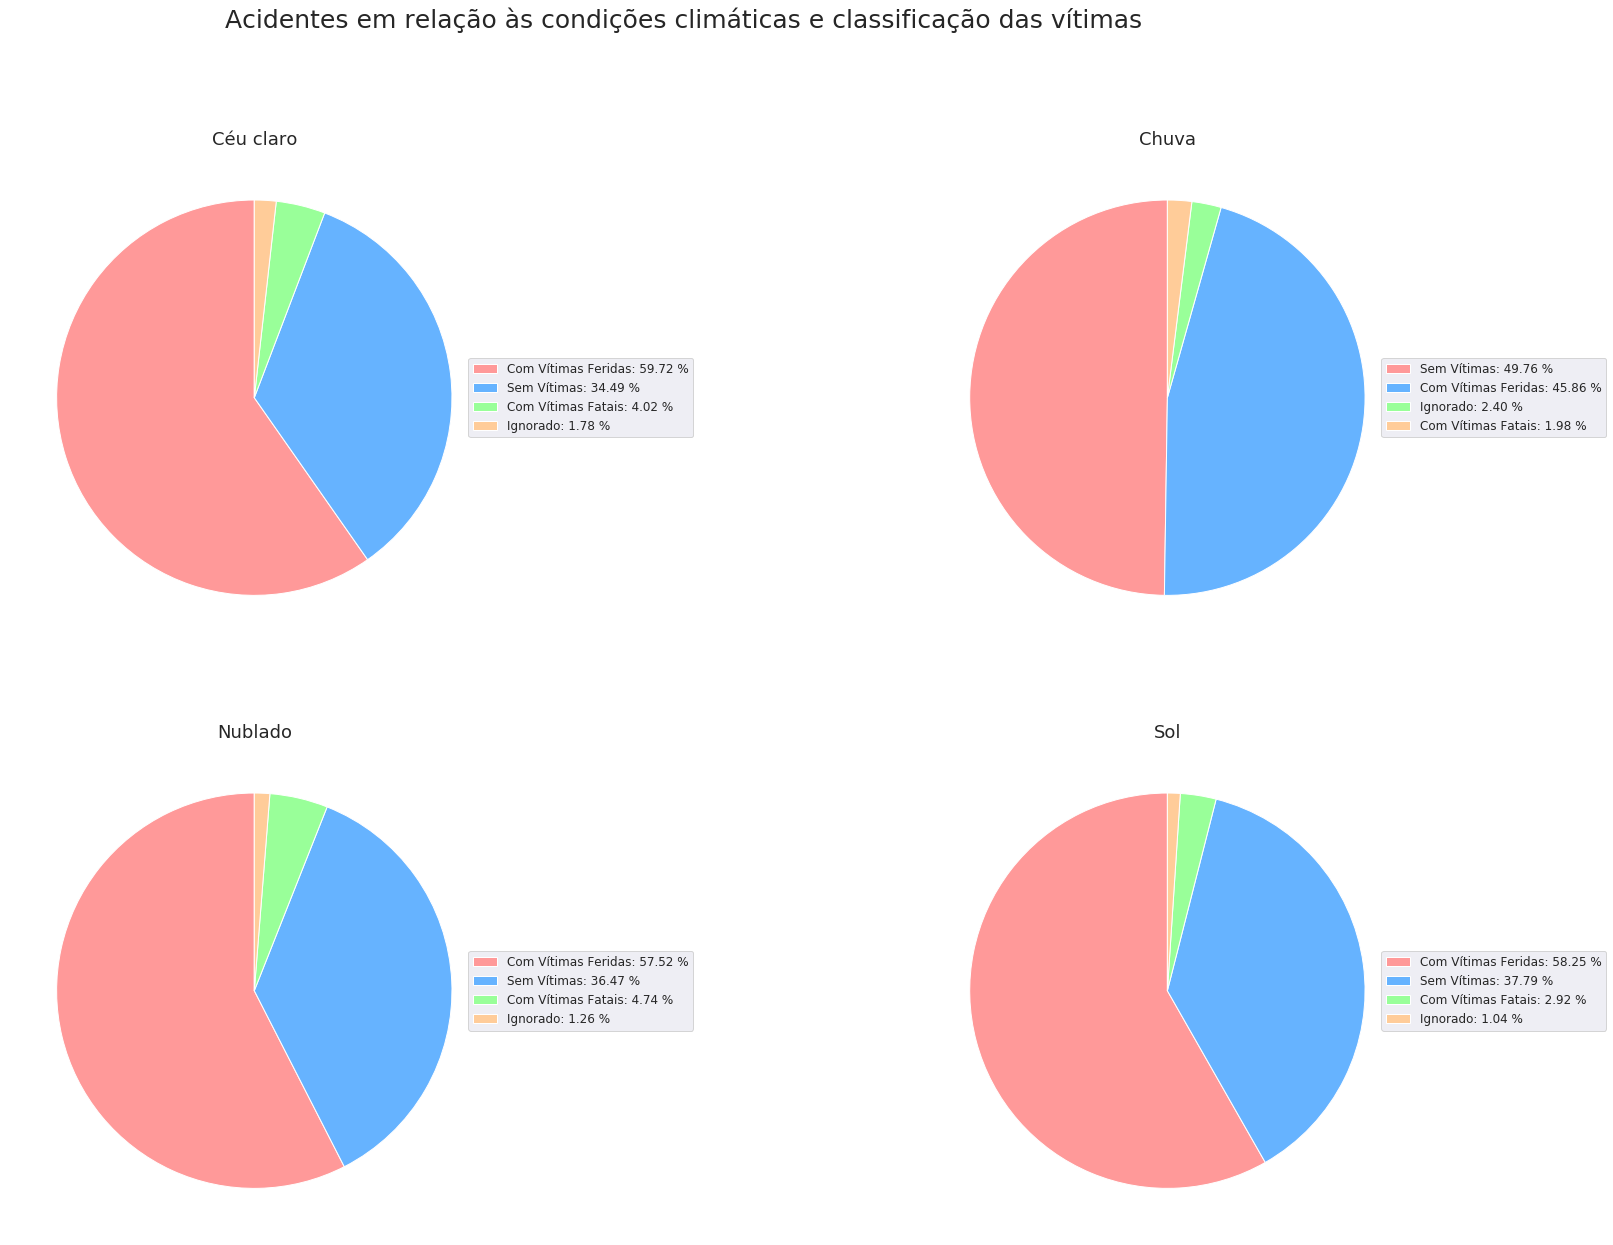

In [52]:
titulo = "Acidentes em relação às condições climáticas e classificação das vítimas"
lista_df_acidentes, lista_condicao_meteorologica = gera_listas_condicao_meteorologica('classificacao_acidente')

fig = plt.figure(figsize=(30, 20))
cores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

i = 0
for linha in range(0, 2):
    for coluna in range(0, 2):
        ax1 = plt.subplot2grid((2, 2),(linha, coluna))
        x = lista_df_acidentes[i]['classificacao_acidente']
        y = lista_df_acidentes[i]['tipo_acidente']
        pct = 100.*y/y.sum()
        patches, texts = plt.pie(y,
                                 colors=cores,
                                 startangle=90,
                                 pctdistance=0.7)
        plt.title(lista_condicao_meteorologica[i], fontsize=18)
        i += 1
        labels = ['{0}: {1:1.2f} %'.format(m,n) for m,n in zip(x, pct)]

        sort_legend = True
        if sort_legend:
            patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                                  key=lambda x: x[2],
                                                  reverse=True))

        plt.legend(patches, labels, loc='center right', bbox_to_anchor=[1.4, 0.5], fontsize=12)

fig.suptitle(titulo, fontsize=25)

### Observações
- Em relação aos acidentes de acordo com o mês e condições climáticas:
    - Na condição de céu claro, a maior parte dos acidentes aconteceu entre maio e agosto (44,9% do total), o que coincide com os meses mais secos. Já entre os meses de novembro e janeiro houveram os índices mais baixos nessa condição (23,2% do total), que são justamente os meses mais chuvosos.
    - Na condição de chuva os meses com maiores índices vão de novembro até março (70,4% do total), enquanto que os menores índices aparecem entre maio e setembro (14% do total). Com isso, é possível observar que a classificação dos acidentes desse dataset está de acordo com o que foi mostrado nos índices pluviométricos.
    - O gráfico da condição nublada é quase um espelho do que foi visto da chuva. Isso é esperado, já que em épocas chuvosas há o aumento da nebulosidade, e vice-versa na seca.
    - Os acidentes enquadrados na condição de sol segue o que foi mostrado na condição de céu claro, com excessão de alguns meses. Nesse caso, os acidentes estão distribuídos mais igualmente entre os meses.


- Em relação aos tipos de acidentes e as condições climáticas:
    - Nas quatro condições mais comuns, os tipos de acidentes que mais aconteceram foram colisão traseira, lateral, transversal, capotamento e saída de pista, que são justamente os tipos de acidentes mais comuns no geral.
    - A porcentagem desses tipos de acidentes de acordo com a condição meteorológica também seguem o mesmo padrão que é visto no geral, com excessão da chuva.
    - Na condição de chuva, o segundo tipo de acidente mais comum é o de saída de pista, que corresponde a 24.8% dos acidentes nessa condição. Ao comparar com céu claro (10,1%), nublado (9%), sol (9,7%) e geral (12,1%), é possível perceber que esse tipo de acidente é muito mais comum na chuva, já que as pistas molhadas criam condições mais propícias para esse tipo de acidente.
    - Capotamentos e saídas de leito carroçável também são tipos de acidentes mais comuns na condição de chuva do que nas outras, o que pode ter relação com a pista molhada. Porém, colisão lateral e transversal possuem porcentagens bem mais baixas na chuva (7,6% e 4% respectivamente) em relação ao céu claro (17,9% e 9,1%) ou nublado (16,7% e 8,6%), por exemplo.


- Em relação à classificação das vítimas e as condições climáticas:
    - As condições de céu claro, nublado e sol seguem proporções semelhantes no que diz respeito à vítimas feridas (59,72%, 57,52% e 58,25% respectivamente), fatais (4,02%, 4,74% e 2,92%) e sem vítimas (34,49%, 36,47% e 37,79%).
    - Na chuva a maior parte dos acidentes é classificado como sem vítimas (49,76%), seguido por com vítimas feridas (45,86%). Comparando com as outras condições, há um decréscimo da porcentagem de feridos e um aumento de acidentes sem vítimas.
    - A condição de chuva também é a que registra menores porcentagens de acidentes com vítimas fatais. Essas duas diferenças de porcentagens na classificação das vítimas de acidentes na chuva pode ter relação com os tipos de acidentes mais comuns nessa condição. Um exemplo é o número alto de saída de pista, que pode ser um acidente mais leve e que não gera lesão ou morte nas vítimas.

In [9]:
def conta_acidentes_estacao(lista_meses):
    acidentes = pd.DataFrame()
    acidentes = df_acidentes_fatais_2008_2017.loc[df_acidentes_fatais_2008_2017['Mes'].isin(lista_meses)].count()
    
    return acidentes['Natureza']

Text(0, 0.5, 'Total de acidentes fatais')

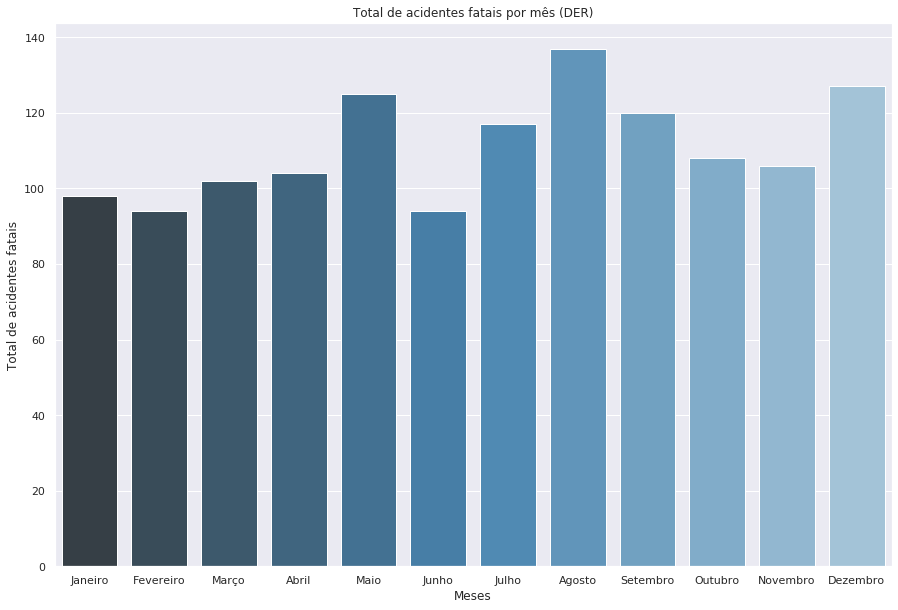

In [8]:
df_acidentes_fatais_2008_2017['Data'] = pd.to_datetime(df_acidentes_fatais_2008_2017['Data'], dayfirst=True)
df_acidentes_fatais_2008_2017['Mes'] = df_acidentes_fatais_2008_2017['Data'].dt.month
df_acidentes_fatais_2008_2017['Ano'] = df_acidentes_fatais_2008_2017['Ano'].astype(str).astype(int)
df_acidentes_fatais_2008_2017['Mes Ano'] = df_acidentes_fatais_2008_2017['Mes'] * 10000 + df_acidentes_fatais_2008_2017['Ano']
acidentes_der_meses = df_acidentes_fatais_2008_2017.groupby('Mes').count().reset_index()
# media_acidentes_der_meses['Natureza'] = media_acidentes_der_meses['Natureza'] / 9
acidentes_der_meses = acidentes_der_meses[['Mes', 'Natureza']]
acidentes_der_meses['Mes'] = acidentes_der_meses['Mes'].replace(dict_meses)

sns.barplot(x = acidentes_der_meses['Mes'],
            y = acidentes_der_meses['Natureza'],
            data = acidentes_der_meses,
            palette = "Blues_d")
plt.title("Total de acidentes fatais por mês (DER)")
plt.xlabel("Meses")
plt.ylabel("Total de acidentes fatais")

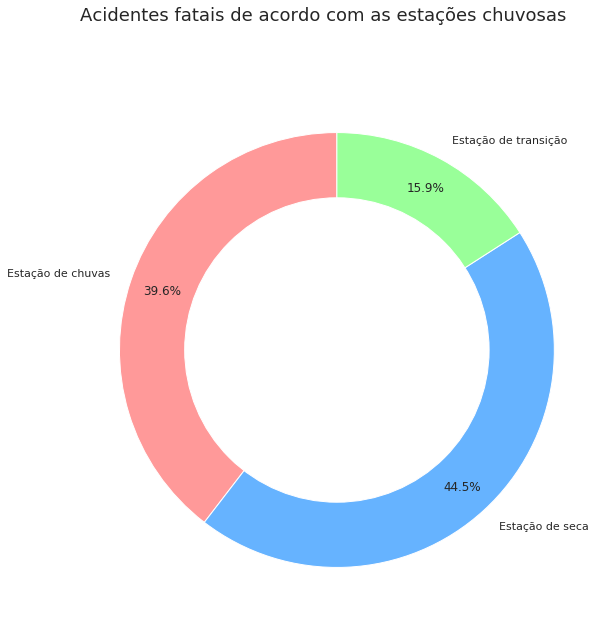

In [10]:
qtd_acidentes_chuva = conta_acidentes_estacao([1, 2, 3, 11, 12])
qtd_acidentes_seca = conta_acidentes_estacao([5, 6, 7, 8, 9])
qtd_acidentes_transicao = conta_acidentes_estacao([4, 10])
qtd_acidentes = [qtd_acidentes_chuva, qtd_acidentes_seca, qtd_acidentes_transicao]
labels = ['Estação de chuvas', 'Estação de seca', 'Estação de transição']

cores = ['#ff9999','#66b3ff','#99ff99'] 
plt.pie(qtd_acidentes,
        colors=cores,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85)

circulo = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

fig.suptitle("Acidentes fatais de acordo com as estações chuvosas", fontsize=18)
plt.show()

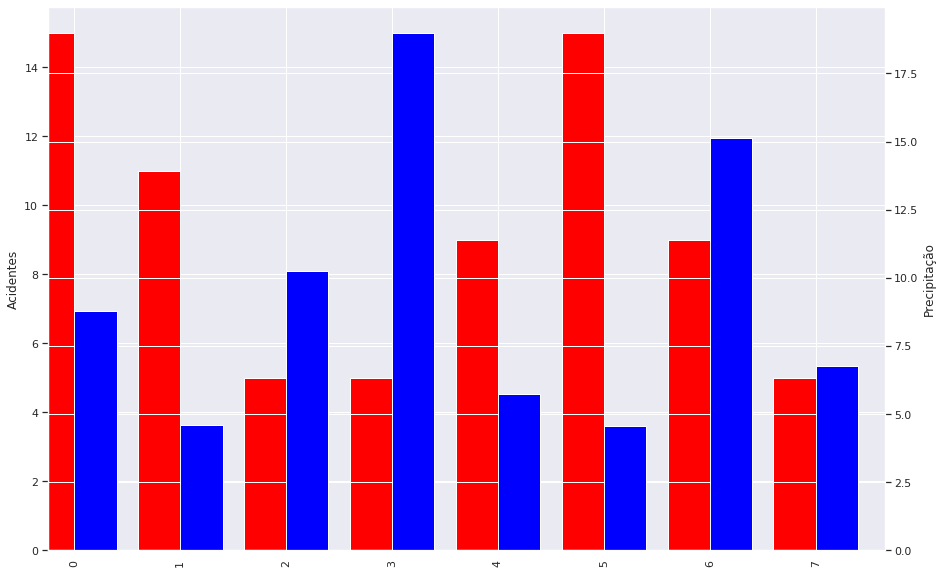

In [41]:
acidentes_janeiro = df_acidentes_fatais_2008_2017.loc[df_acidentes_fatais_2008_2017['Mes'] == 1]
acidentes_janeiro = acidentes_janeiro.groupby('Ano').count().reset_index()
acidentes_janeiro = acidentes_janeiro.drop([0, 1]).reset_index(drop=True)
precipitacao_janeiro = df_meteorologia_2010_2019.loc[df_meteorologia_2010_2019['Mes'] == 1]
precipitacao_janeiro = precipitacao_janeiro.groupby('Ano').mean().reset_index()
precipitacao_janeiro = precipitacao_janeiro.drop([8, 9]).reset_index(drop=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

acidentes_janeiro.Data.plot(kind='bar', color='red', ax=ax, width=width, position=1)
precipitacao_janeiro.Precipitacao.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Acidentes')
ax2.set_ylabel('Precipitação')

plt.show()

In [38]:
precipitacao_janeiro.Precipitacao

0     8.770968
1     4.612903
2    10.238710
3    18.996774
4     5.719355
5     4.545161
6    15.119355
7     6.774194
Name: Precipitacao, dtype: float64

### Observações
- 

In [29]:
medias_acidentes_precipitacao = pd.merge(media_precipitacao_meses, media_acidentes_rodovias_meses, left_on='Mes', right_on='Mes')
medias_acidentes_precipitacao = medias_acidentes_precipitacao.merge(media_acidentes_der_meses, on='Mes')
medias_acidentes_precipitacao = medias_acidentes_precipitacao.rename(columns={"causa_acidente": "Acidentes Rodovias", "Natureza": "Acidentes Fatais (DER)"})
medias_acidentes_precipitacao

,Mes,Precipitacao,Acidentes Rodovias,Acidentes Fatais (DER)
0,Janeiro,8.204516,106.000000,98
1,Fevereiro,7.641489,104.666667,94
2,Março,10.480645,119.888889,102
3,Abril,6.002333,108.444444,104
4,Maio,1.386774,122.555556,125
5,Junho,0.184333,114.333333,94
6,Julho,0.032581,115.333333,117
7,Agosto,0.170874,130.625000,137
8,Setembro,1.196296,108.375000,120
9,Outubro,5.809319,115.125000,108


In [30]:
def correlaciona_acidentes_precipitacao(acidentes):
    corr_acidentes_precipitacao = medias_acidentes_precipitacao[acidentes].corr(medias_acidentes_precipitacao['Precipitacao'])    

    print('Valor da correlação: {}'.format(corr_acidentes_precipitacao))
    sns.regplot(x = medias_acidentes_precipitacao['Precipitacao'], y = medias_acidentes_precipitacao[acidentes], data = medias_acidentes_precipitacao, fit_reg = True)
    plt.title("Correlação entre a média de precipitação e " + acidentes)
    plt.show()

Valor da correlação: -0.3359042769725179


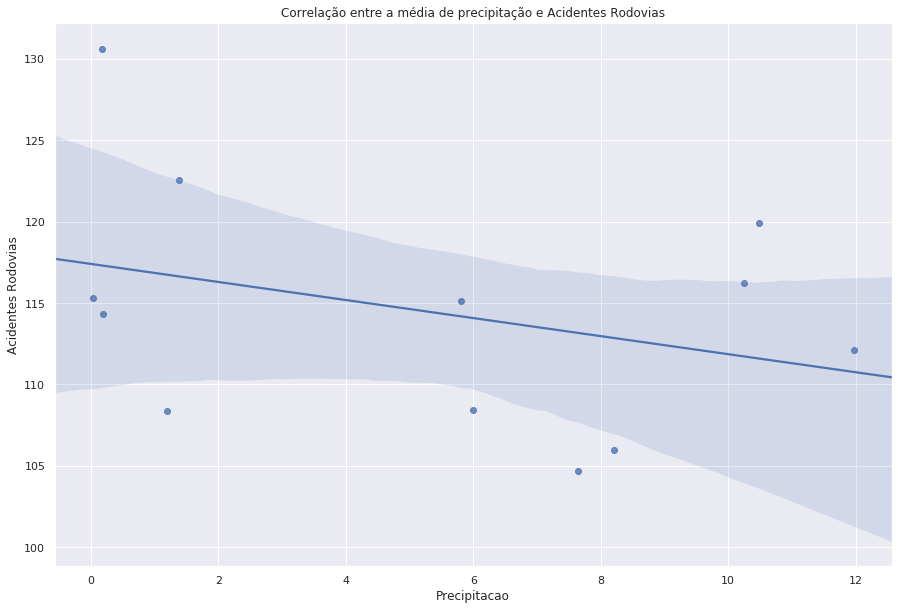

In [31]:
correlaciona_acidentes_precipitacao('Acidentes Rodovias')

Valor da correlação: -0.36704298958002474


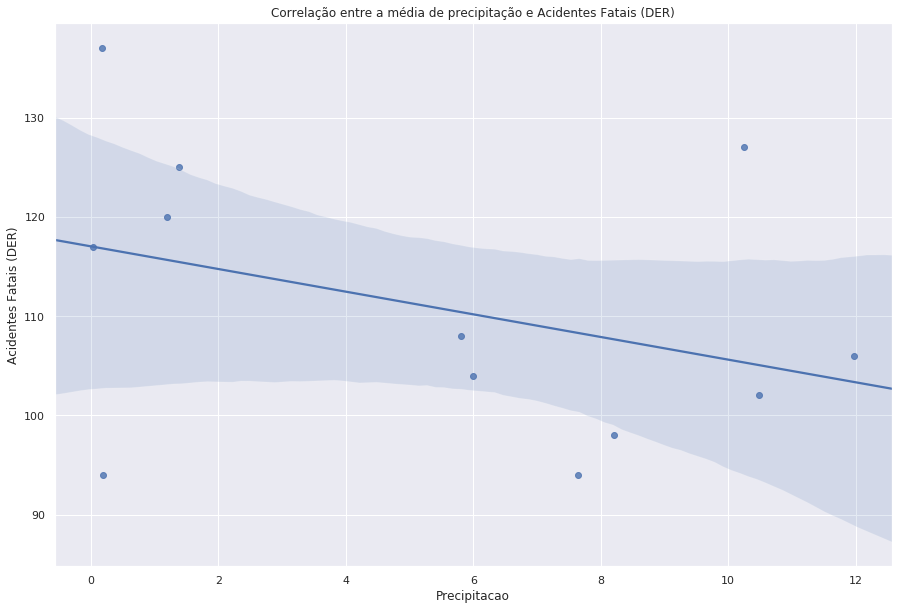

In [32]:
correlaciona_acidentes_precipitacao('Acidentes Fatais (DER)')

### Observações
- A correlação de Pearson, tanto dos acidentes nas rodovias quanto dos dados do DER deram por volta de -0,3. Esse resultado mostra que é uma correlação negativa fraca.
- Com isso, meses com índices de precipitação mais altos não necessariamente são aqueles com mais acidentes.